# 1. Wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
word_frequencies = {
    'Machine Learning': 10,
    'Deep Learning': 8,
    'Data Science': 7,
    'Python': 6,
    'Kaggle': 5,
    'Spanish C1': 4,
    'English B2': 4,
    'Feature Engineering': 4,
    'Data Preprocessing': 3,
    'Hyperparameter Optimization': 3,
    'NLP': 1,
    'TensorFlow': 2,
    'R': 2,
    'Artificial Intelligence': 9,
    'Statistics': 6,
    'SQL': 5,
    'Big Data': 4,
    'Data Visualization': 4,
    'EDA': 5,
    'Scikit-learn': 3,
    'Pandas': 4,
    'Matplotlib': 3,
    'Seaborn': 3,
    'Neural Networks': 6,
    'Computer Vision': 4,
    'CNN': 3,
    'Data Wrangling': 4,
    'Optimization': 3,
    'Model Evaluation': 2,
    'Dimensionality Reduction': 3,
    'Gradient Boosting': 2,
    'XGBoost': 2,
    'Transformers': 1,
    'U-Net': 3,  # Añadido U-Net
    'Regression': 4,  # Añadido Regression
    'Image Classification': 4,  # Añadido Image Classification
    'Image Segmentation': 4,  # Añadido Image Segmentation
}


In [ ]:
# Cargar la imagen de la persona (asegúrate de usar una imagen en blanco y negro)
image_path = "siueta_mujer.png"  # Cambia esto a la ruta de tu imagen
image = Image.open(image_path)
image = image.resize((800, 950))
image = image.convert("L")
# Aplicar umbral para hacer la imagen binaria (negro y blanco)
threshold = 200  # Ajusta este valor si es necesario
image = image.point(lambda p: p > threshold and 255)
mask = np.array(image)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
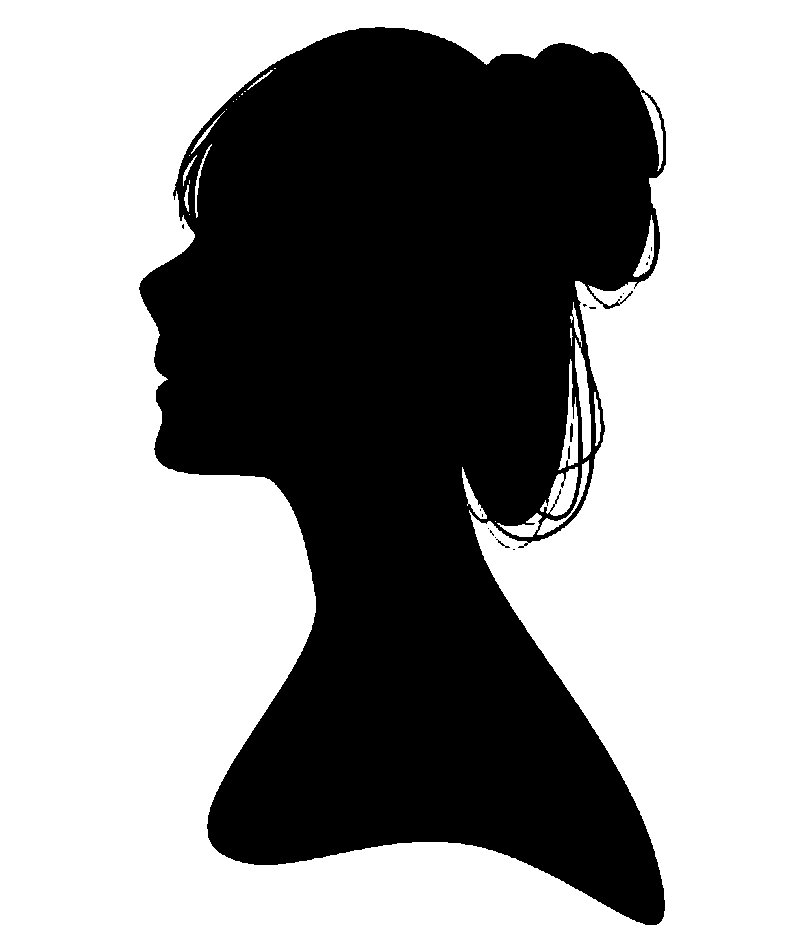

In [ ]:
mask

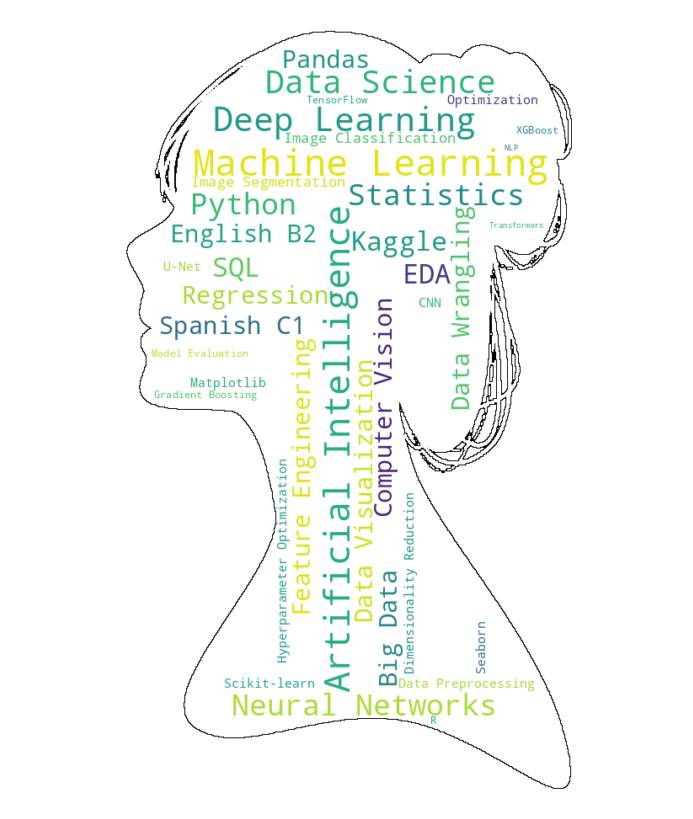

In [ ]:
 #Crear el objeto WordCloud con las configuraciones que desees
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap='viridis',
                      max_words=100,
                      mask=mask,  # Aplica la imagen como máscara
                      contour_width=1,
                      contour_color='black').generate_from_frequencies(word_frequencies)

# Mostrar el WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.tight_layout(pad=0)
# Mostrar la imagen
plt.show()

# PieChart

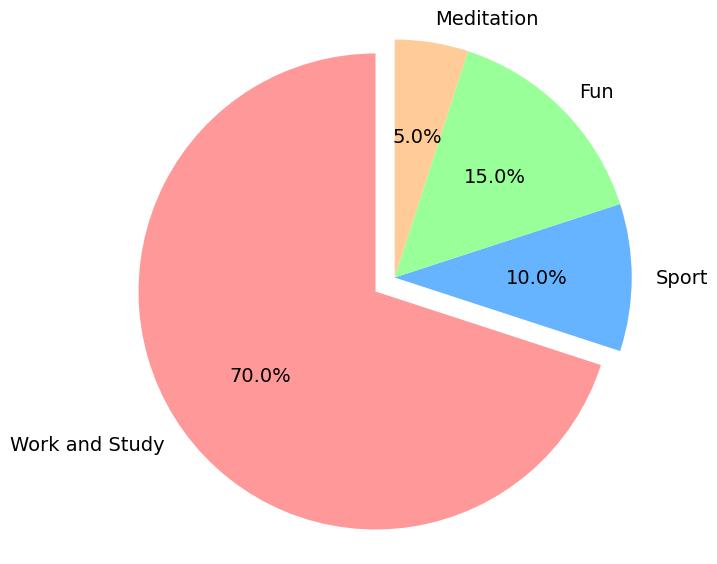

In [35]:
import matplotlib.pyplot as plt

# Datos del gráfico
labels = ['Work and Study', 'Sport', 'Fun', 'Meditation']
sizes = [70, 10, 15, 5]  # Aumentamos el tamaño de "Work and Study" a 70
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Colores personalizados
explode = (0.1, 0, 0, 0)  # Destacar la primera sección

# Crear el pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, textprops={'fontsize': 14})

# Título con tamaño de fuente grande
# plt.title('My Activities', fontsize=16)

# Mostrar el gráfico
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto
plt.show()


# 3. Radar

In [70]:
import plotly.express as px
import pandas as pd

# Datos de las asignaturas y sus notas
asignaturas = ['Fundamentals of Big Data Technology', 'Big Data Storage and Management Systems',
               'Mass Data Processing', 'Security & Legislation',
               'Data Mining', 'Advanced Statistics', 'Machine Learning', 'Data Visualization',
               'Business Intelligence', 'Data Science for Decision Making',
               'Deep Learning', 'External Internships',
               'Master’s Thesis', 'Programming Tools', 'Database Tools']

notas = [9.90, 9.40, 9.70, 9.00, 9.70, 9.00, 10.00, 8.90, 9.20, 9.10, 8.60, 9.30, 10.00, 9.20, 9.80]

# Convertir los datos a un DataFrame
df = pd.DataFrame({
    'r': notas,  # Notas de cada asignatura
    'theta': asignaturas  # Asignaturas
})

# Añadir la nota media (serie adicional)
nota_media = 9.37
df_media = pd.DataFrame({
    'r': [nota_media] * len(asignaturas),
    'theta': asignaturas
})

# Graficar el gráfico de radar con relleno
fig = px.line_polar(df, r='r', theta='theta', line_close=True)

# Añadir relleno para las asignaturas (color y opacidad)
fig.add_scatterpolar(r=df['r'], theta=df['theta'], fill='toself', fillcolor='rgba(0, 100, 255, 0.3)', line=dict(color='blue'), name='My Grades')

# Añadir la serie de la nota media
fig.add_scatterpolar(r=df_media['r'], theta=df_media['theta'], line=dict(color='red', dash='dash'), name=f'My Average Grade ({nota_media})')

fig.update_layout(
    legend=dict(
        yanchor="bottom",  # Anclar la leyenda en la parte inferior
        y=1.2,  # Posicionar la leyenda encima del gráfico
        xanchor="center",  # Centrar la leyenda
        x=0.5  # Centrarla en el gráfico
    )
)

# Mostrar el gráfico
fig.show()


# Violin

In [91]:
import numpy as np
import pandas as pd

# Cursos
cursos = [
    'Hugging Face NLP Course, 2024',
    'Practical Deep Learning for Coders, 2024',
    'Data Science: Visualization, Harvard University (via edX), 2023',
    'Data Mining and Business Intelligence, Hazerta, 2022',
    'The Data Science Course, Udemy, 2023',
    'Data Analysis, Coursera, 2023',
    'Crash Course on Python, Coursera, 2023',
    'Data Analysis with R Programming, Coursera, 2023'
]

# Generación de horas dedicadas (con diferentes distribuciones)
np.random.seed(42)  # Para que los resultados sean reproducibles

horas = {
    'Curso': np.repeat(cursos, 50),  # 50 observaciones por curso
    'Horas': np.concatenate([
        np.random.normal(loc=3, scale=0.5, size=50),  # Horas para Hugging Face NLP (distribución normal)
        np.random.uniform(1, 3, size=50),  # Horas para Deep Learning (distribución uniforme)
        np.random.normal(loc=1.5, scale=0.8, size=50),  # Horas para Visualization (distribución normal)
        np.random.normal(loc=2, scale=0.5, size=50),  # Horas para Data Mining (distribución normal)
        np.random.normal(loc=2.5, scale=1, size=50),  # Horas para Data Science Course (distribución normal)
        np.random.uniform(1, 3, size=50),  # Horas para Data Analysis (distribución uniforme)
        np.random.normal(loc=4, scale=1, size=50),  # Horas para Python Course (distribución normal)
        np.random.lognormal(mean=0.5, sigma=0.5, size=50)
    ])
}

# Convertir los datos a un DataFrame
df = pd.DataFrame(horas)

# Asegurémonos de que no haya valores negativos en las horas (si es necesario)
df['Horas'] = df['Horas'].clip(lower=0)

# Mostrar las primeras filas del DataFrame
df.head()


,Curso,Horas
0,"Hugging Face NLP Course, 2024",3.248357
1,"Hugging Face NLP Course, 2024",2.930868
2,"Hugging Face NLP Course, 2024",3.323844
3,"Hugging Face NLP Course, 2024",3.761515
4,"Hugging Face NLP Course, 2024",2.882923


In [110]:
import plotly.express as px

fig = px.violin(df, y='Curso', x='Horas', box=True, color='Curso',
                points='outliers')  # draw box plot inside the violin

# Cambiar el gráfico a orientación vertical
fig.update_layout(
    xaxis_title="Hours per Day",
    yaxis_title="Courses",
    violingap=0,
    showlegend=False
)


fig.show()
